Que 3.
The SAT-GPA dataset contains information of SAT and GPA scores. 
We have to predict GPA score on the basis of SAT score by using Linear Regression and Polynomial Regression model. 
Also evaluate the model by using evaluation metrics.

In [25]:
import warnings
warnings.filterwarnings(action='ignore')

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [27]:
df=pd.read_csv("./dataset/SAT-GPA.csv")


In [28]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [42]:
X=df[['SAT']]
y=df['GPA']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=123456)

linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_linear=linear_model.predict(x_test)

In [53]:
# 4. Evaluations
print("\nLinear Regression Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R² Score:", r2_score(y_test, y_pred_linear))


Linear Regression Evaluation:
Mean Squared Error: 0.06527139877486732
R² Score: 0.3498461337040769


In [55]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(x_train)
X_test_poly=poly.transform(x_test)


poly_model=LinearRegression()
poly_model.fit(X_train_poly,y_train)
y_pred=poly_model.predict(X_test_poly)

In [57]:
print("\nPolynomial Regression Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R² Score:", r2_score( y_test,y_pred))



Polynomial Regression Evaluation:
Mean Squared Error: 0.07322055341491616
R² Score: 0.2706663747282062


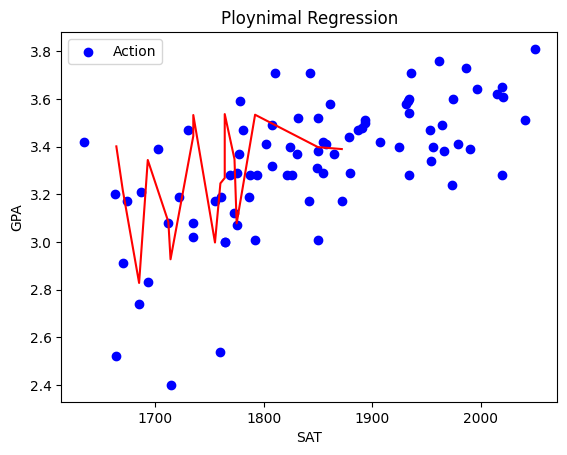

In [58]:
plt.scatter(X,y,color='blue',label='Action')
sorted_zip=sorted(zip(X['SAT'],y_pred))
x_sorted,y_sorted=zip(*sorted_zip)

plt.plot(x_sorted,y_sorted,color='red')

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.legend()
plt.title("Ploynimal Regression")
plt.show()